<a href="https://colab.research.google.com/github/pranay8297/deep-learning-projects/blob/master/MyLinear_complete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np

In [0]:
from torch.nn.parameter import Parameter

In [0]:
from fastai.basics import *

In [0]:
cuda0 = torch.device('cuda:0')

In [45]:
cuda0

device(type='cuda', index=0)

In [0]:
lin = nn.Linear(100,10).cuda()

In [50]:
params = [i for i in lin.parameters()]
params

[Parameter containing:
 tensor([[-4.8194e-02,  3.2661e-03, -2.6576e-02, -1.3800e-02,  6.1212e-02,
          -8.9127e-02,  1.1482e-02, -4.9211e-02, -8.4559e-02, -1.3039e-02,
          -8.4302e-02, -9.9381e-02,  7.7602e-02,  6.6465e-02,  8.2780e-02,
          -4.1025e-02, -3.4087e-02, -5.8901e-02,  9.2968e-02,  6.2049e-02,
          -4.7608e-02, -9.3100e-02,  1.9410e-02,  7.4386e-02, -4.9447e-03,
           1.5020e-02, -3.1180e-02,  4.7160e-02, -5.7854e-02, -3.4044e-02,
          -4.8939e-02,  8.9813e-02,  7.7868e-02,  6.8303e-02, -1.3343e-02,
           7.0514e-02,  4.9544e-02, -7.6671e-03, -8.6776e-02, -8.1218e-02,
           8.8289e-02,  7.2377e-02,  4.1388e-03,  8.5504e-02,  2.0907e-02,
           5.3221e-02,  3.9917e-02, -1.3506e-02, -1.9884e-02,  4.7062e-02,
          -5.8868e-02,  1.9006e-02, -7.5801e-02,  5.6114e-02,  4.7221e-02,
           8.3496e-02,  5.0298e-02, -9.7236e-02, -7.9198e-02, -8.9234e-02,
          -8.9771e-02,  3.4836e-02,  2.0349e-02, -8.7804e-02, -4.6875e-02,
  

In [4]:
!pip install ipdb

  Created wheel for ipdb: filename=ipdb-0.13.2-cp36-none-any.whl size=10522 sha256=0557c904d9ab5e0fb90f172359f4997508852b3bb765d9b728ff8f781f879fa3
  Stored in directory: /root/.cache/pip/wheels/60/c2/15/793365e3c9318c46ba914263740d90f1fe67f544b979141ce4
Successfully built ipdb


In [0]:
from ipdb import set_trace as st

In [20]:
x = torch.randn(2, 2, requires_grad = True)

# From numpy
x = np.array([1., 2., 3.]) #Only Tensors of floating point dtype can require gradients
x = torch.from_numpy(x)
# Now enable gradient 
x.requires_grad_(True)
# _ above makes the change in-place (its a common pytorch thing)

tensor([1., 2., 3.], dtype=torch.float64, requires_grad=True)

In [22]:
x.data.zero_()

tensor([0., 0., 0.], dtype=torch.float64)

In [23]:
x

tensor([0., 0., 0.], dtype=torch.float64, requires_grad=True)

In [0]:
x = torch.randn(2, 2, requires_grad= True)

In [0]:
x = np.array([1., 2., 3.])

In [25]:
x

array([1., 2., 3.])

In [0]:
x_1 = map(torch.tensor, (x))

In [0]:
x = torch.from_numpy(x)

In [28]:
x

tensor([1., 2., 3.], dtype=torch.float64)

In [29]:
x.requires_grad = True
x

tensor([1., 2., 3.], dtype=torch.float64, requires_grad=True)

In [30]:
x.requires_grad_(True)
x

tensor([1., 2., 3.], dtype=torch.float64, requires_grad=True)

In [31]:
import torch

# Creating the graph
x = torch.tensor(1.0, requires_grad = True)
y = torch.tensor(2.0)
z = x * y

# Displaying
for i, name in zip([x, y, z], "xyz"):
    print(f"{name}\ndata: {i.data}\nrequires_grad: {i.requires_grad}\n\grad: {i.grad}\ngrad_fn: {i.grad_fn}\nis_leaf: {i.is_leaf}\n")

x
data: 1.0
requires_grad: True
\grad: None
grad_fn: None
is_leaf: True

y
data: 2.0
requires_grad: False
\grad: None
grad_fn: None
is_leaf: True

z
data: 2.0
requires_grad: True
\grad: None
grad_fn: <MulBackward0 object at 0x7feafd6de978>
is_leaf: False



In [6]:
!wget http://deeplearning.net/data/mnist/mnist.pkl.gz

--2020-04-26 12:08:12--  http://deeplearning.net/data/mnist/mnist.pkl.gz
Resolving deeplearning.net (deeplearning.net)... 132.204.26.28
Connecting to deeplearning.net (deeplearning.net)|132.204.26.28|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16168813 (15M) [application/x-gzip]
Saving to: ‘mnist.pkl.gz’

mnist.pkl.gz        100%[===================>]  15.42M  7.01MB/s    in 2.2s    

2020-04-26 12:08:15 (7.01 MB/s) - ‘mnist.pkl.gz’ saved [16168813/16168813]



In [7]:
!pwd

/content


In [0]:
path = Path('/content')

In [9]:
path.ls()

[PosixPath('/content/.config'),
 PosixPath('/content/mnist.pkl.gz'),
 PosixPath('/content/sample_data')]

In [0]:
with gzip.open(path/'mnist.pkl.gz', 'rb') as f:
  (x_train, y_train), (x_valid, y_valid), _ = pickle.load(f, encoding = 'latin-1')

In [11]:
x_train, y_train

(array([[0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        ...,
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.],
        [0., 0., 0., 0., ..., 0., 0., 0., 0.]], dtype=float32),
 array([5, 0, 4, 1, ..., 0, 8, 4, 8]))

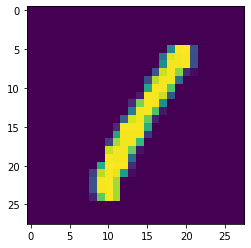

In [12]:
plt.imshow(x_train[3].reshape((28,28)))

In [0]:
x_train, y_train, x_valid, y_valid = map(torch.tensor, (x_train, y_train, x_valid, y_valid))

In [14]:
x_train.shape

torch.Size([50000, 784])

In [0]:
test = torch.rand(5, 5)
test_2 = torch.rand(5, 5)

In [133]:
test.cuda()

tensor([[0.3013, 0.3417, 0.4416, 0.4393, 0.8587],
        [0.4555, 0.4339, 0.4446, 0.3584, 0.0542],
        [0.4183, 0.5120, 0.9956, 0.7079, 0.4810],
        [0.1974, 0.9558, 0.7099, 0.8816, 0.8581],
        [0.5408, 0.6494, 0.4579, 0.9321, 0.6539]], device='cuda:0')

In [0]:
train_ds = TensorDataset(x_train, y_train)
valid_ds = TensorDataset(x_valid, y_valid)

In [0]:
bs = 64
data= DataBunch.create(train_ds, valid_ds, bs)

In [16]:
data

DataBunch;

Train: <torch.utils.data.dataset.TensorDataset object at 0x7ff77a4df7f0>;

Valid: <torch.utils.data.dataset.TensorDataset object at 0x7ff77a4df860>;

Test: 64

In [0]:
x, y = next(iter(data.train_dl))

In [0]:
loss_function = nn.CrossEntropyLoss()

In [0]:
a = torch.Tensor()

In [118]:
a.add(torch.tensor(2))

tensor([])

In [43]:
torch.ones([2, 4], dtype=torch.float64, device=cuda0)

NameError: ignored

In [0]:
class Linear(nn.Module):
  def __init__(self, in_features, out_features, with_bias = False):
    super().__init__()
    self.with_bias = with_bias
    self.in_features = in_features
    self.out_features = out_features

    # self.weights = Parameter(torch.rand(out_features, in_features, requires_grad= True))
    # self.bias = Parameter(torch.rand(out_features, requires_grad= True))

    self.weights = torch.rand(out_features, in_features, requires_grad= True, device=cuda0)
    self.bias = torch.rand(out_features, requires_grad= True, device=cuda0)

    self.parameter = []

    self.bound_parameters()
    self.register_parameters()

  def forward(self, xb):
    activation = xb @ torch.transpose(self.weights, 0, 1)
    if self.with_bias:
      for act in activation:
        act.add_(self.bias)
    return activation

  def bound_parameters(self):
    stdv = 1./math.sqrt(self.weights.shape[1])
    self.weights.data.uniform_(-stdv, stdv)
    if self.with_bias:
      self.bias.data.uniform_(-stdv, stdv)
  
  def register_parameters(self):
    self.parameter.append(self.weights)
    if self.with_bias:
      self.parameter.append(self.bias)
  
  def parameters(self):
    for param in self.parameter:
      yield param
  
  def reset_grads(self):
    for param in self.parameters():
      if max(param.grad) != 0.0:
        param.grad.zero_()

In [40]:
doc(Parameter)

In [0]:
lin = Linear(784, 10, True).cuda()

In [0]:
M = torch.Tensor([[[1, 2, 3], [4, 5, 6]],[[10, 20, 30], [40, 50, 60]]])

In [0]:
pars = [i for i in lin.parameters()]

In [54]:
pars[0].data

tensor([[ 0.0107,  0.0092,  0.0009,  ..., -0.0297, -0.0204, -0.0270],
        [ 0.0064, -0.0050,  0.0088,  ..., -0.0305,  0.0215,  0.0156],
        [ 0.0108, -0.0119,  0.0173,  ...,  0.0307, -0.0356,  0.0345],
        ...,
        [-0.0102,  0.0233,  0.0196,  ...,  0.0310, -0.0246, -0.0247],
        [-0.0187, -0.0348,  0.0012,  ...,  0.0120,  0.0212, -0.0295],
        [-0.0239,  0.0345, -0.0344,  ..., -0.0131, -0.0155,  0.0321]],
       device='cuda:0')

In [59]:
pars

[tensor([[-0.0264,  0.0137, -0.0016,  ...,  0.0341, -0.0104,  0.0065],
         [-0.0155,  0.0250, -0.0266,  ...,  0.0053, -0.0161,  0.0072],
         [-0.0306,  0.0098,  0.0130,  ...,  0.0072,  0.0041,  0.0017],
         ...,
         [ 0.0041,  0.0171,  0.0141,  ..., -0.0057, -0.0094, -0.0209],
         [ 0.0350,  0.0068,  0.0021,  ...,  0.0134,  0.0044,  0.0167],
         [ 0.0179, -0.0310,  0.0184,  ...,  0.0088, -0.0262,  0.0065]],
        device='cuda:0', requires_grad=True),
 tensor([-0.0122, -0.0335,  0.0259,  0.0139, -0.0238, -0.0329,  0.0074, -0.0190,
         -0.0312,  0.0244], device='cuda:0', requires_grad=True)]

In [96]:
pars[0].data

tensor([[ 0.0122,  0.0022,  0.0085,  ..., -0.0201,  0.0119, -0.0316],
        [-0.0315, -0.0305,  0.0047,  ..., -0.0260, -0.0010, -0.0139],
        [ 0.0327,  0.0236, -0.0287,  ..., -0.0084, -0.0013,  0.0273],
        ...,
        [-0.0323,  0.0232,  0.0221,  ..., -0.0007,  0.0196,  0.0195],
        [-0.0149, -0.0237,  0.0199,  ...,  0.0210,  0.0025,  0.0182],
        [ 0.0258,  0.0062, -0.0214,  ...,  0.0159,  0.0217,  0.0303]],
       device='cuda:0')

In [0]:
new_lin = nn.Linear(784, 10, True).cuda()

In [0]:
# new_yhat = new_lin(x)
y_hat = lin(x)

In [0]:
y_hat

In [0]:
# n_loss = loss_function(new_yhat, y)
loss = loss_function(y_hat, y)

In [64]:
loss

tensor(2.3616, device='cuda:0', grad_fn=<NllLossBackward>)

In [0]:
# n_loss.backward()
loss.backward()

In [0]:
params = [i for i in lin.parameters()]

In [68]:
lin.weights.grad.shape, lin.weights.shape

(torch.Size([10, 784]), torch.Size([10, 784]))

In [69]:
lin.weights.grad.data.max(), lin.weights.grad.data.min()

(tensor(0.0764, device='cuda:0'), tensor(-0.0938, device='cuda:0'))

In [0]:
wd = 1e-05
w2 = 

In [0]:
lr = 1e-02
with torch.no_grad():
  lin.weights.sub_(lr*lin.weights.grad)
  lin.bias.sub_(lr*lin.bias.grad)
  lin.weights.grad.zero_()
  lin.bias.grad.zero_()

In [0]:
a = torch.tensor([2., 3.])

In [47]:
def test_a():
  for i in a:
    yield i

test_a()

<generator object test_a at 0x7f46ba667888>

In [48]:
for i in test_a():
  print(i)

tensor(2.)
tensor(3.)


In [0]:
a = []
for i in range(4):
    a.append(torch.rand(1, 2))

b = torch.Tensor(3, 4)
c = torch.cat(a, out=b)

In [0]:
a = torch.tensor([1., 2.])
b = torch.tensor([3., 4., 5.])
c = torch.cat(a, b))

In [63]:
c

tensor([1., 2., 3., 4., 5.])

In [0]:
class MnistOwn(nn.Module):
  def __init__(self, in_features, out_features, with_bias):
    super().__init__()
    self.lin = Linear(in_features, 50, with_bias)
    self.lin_1 = Linear(50, out_features, with_bias)
  
  def forward(self, xb):
    act = F.relu(self.lin(xb))
    return self.lin_1(act)

In [0]:
nd = [i for i in model.parameters()]

[]

In [75]:
model.lin.weights, model.lin.bias

(tensor([[-0.0322,  0.0246, -0.0028,  ...,  0.0018,  0.0201, -0.0118],
         [-0.0341,  0.0240,  0.0291,  ..., -0.0083, -0.0253, -0.0004],
         [ 0.0161,  0.0168,  0.0187,  ..., -0.0344, -0.0079, -0.0168],
         ...,
         [ 0.0179,  0.0079,  0.0333,  ...,  0.0113,  0.0180, -0.0265],
         [ 0.0005, -0.0089,  0.0205,  ...,  0.0280,  0.0014,  0.0166],
         [-0.0032,  0.0232,  0.0321,  ...,  0.0313,  0.0036,  0.0077]],
        device='cuda:0', requires_grad=True),
 tensor([-0.0315,  0.0203, -0.0193, -0.0116, -0.0318,  0.0055, -0.0114, -0.0129,
         -0.0260,  0.0234], device='cuda:0', requires_grad=True))

In [79]:
w2 = 0
for i in model.lin.parameters():
  w2 += i.sum()


tensor(-0.3595, device='cuda:0', grad_fn=<AddBackward0>)

In [0]:
wd = 1e-05
lr = 1e-02
def update(x, y, lr):
  y_hat = model(x)
  w2 = 0
  for i in model.lin.parameters():
    w2 += i.sum()
  loss = loss_function(y_hat, y) + (w2**2)*wd
  loss.backward()
  with torch.no_grad():
    for param in model.lin.parameters():
      param.sub_(7e-02*param.grad)
      param.grad.zero_()
    for parm_1 in model.lin_1.parameters():
      parm_1.sub_(lr*parm_1.grad)
      parm_1.grad.zero_()
  return loss.item()

In [0]:
model = MnistOwn(784, 10, True).cuda()

In [0]:
losses = [update(x, y, lr) for x, y in data.train_dl]

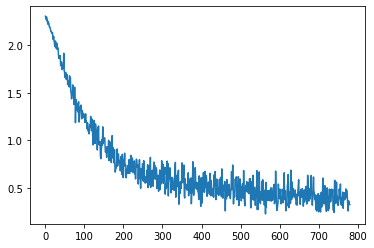

In [124]:
plt.plot(losses)

In [0]:
acts = model(x)

In [0]:
preds = []
for i in acts:
  max_prob = i.max()
  preds.append(list(i).index(max_prob))

In [132]:
len(preds)

64

In [136]:
correct = 0
for i in range (0, len(preds)):
  if preds[i] == y[i]:
    correct += 1
acc = correct/len(preds)
acc

0.859375

In [141]:
preds = []
for i, k in data.valid_dl:
  act = model(i)
  for j in act:
    max_prob = j.max()
    preds.append(list(j).index(max_prob))

correct_data = valid_ds.tensors[1]
correct_preds = 0
for i in range(len(preds)):
  if preds[i] == correct_data[i]:
    correct_preds +=1

acc = correct_preds/len(preds)
acc

0.9019

In [129]:
y

tensor([6, 8, 5, 8, 8, 9, 1, 4, 0, 9, 9, 6, 9, 4, 5, 3, 6, 0, 1, 4, 7, 0, 1, 1,
        9, 7, 7, 0, 8, 1, 8, 7, 6, 3, 8, 7, 9, 8, 7, 6, 3, 9, 3, 8, 4, 3, 9, 0,
        7, 5, 6, 8, 0, 4, 0, 7, 4, 1, 0, 4, 5, 3, 6, 2], device='cuda:0')